In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import plot_roc_curve

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import NMF, PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (confusion_matrix, precision_score, 
                                    recall_score, accuracy_score, r2_score, 
                                    plot_confusion_matrix)

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, plot_confusion_matrix
from sklearn.cluster import DBSCAN

from sklearn import (
    cluster, decomposition, ensemble, manifold, 
    random_projection, preprocessing)
from sklearn.utils.class_weight import compute_class_weight

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# from sklearn.neighbors import KNeighborsRegressor

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import random

import json

In [2]:
df = pd.read_csv('../data/smtweetdata.csv')

In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [4]:
def lemmatizer(text):
    

df['lower_text'] = df['full_text'].apply(lambda x: str(x).lower())
df['lemmatized'] = df['lower_text'].apply(lambda x: lemmatizer(x))

NameError: name 'lemmatize_str' is not defined

In [129]:
tweets = df.lemmatized.values

In [130]:
stop_words = list(STOPWORDS)
stop_words.append('rt')

In [131]:
def orig_vect(X_train, custom_stopwords):
    '''
    pass in x training data to fit and transform to

    Returns:
     vectorizer, x_train vectorized
    '''
    vectorizer = CountVectorizer(stop_words=custom_stopwords, max_features = 100, analyzer='word', ngram_range=(1,2))
    x_train_vect = vectorizer.fit_transform(X_train)
    return vectorizer, x_train_vect

In [132]:
vectorizer, x_train_vect = orig_vect(tweets, stop_words)

/home/heather/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [133]:
x_train_vect

<1000x100 sparse matrix of type '<class 'numpy.int64'>'
	with 3751 stored elements in Compressed Sparse Row format>

In [134]:
features = vectorizer.get_feature_names()
vect_features = x_train_vect.toarray().mean(axis = 0)

In [148]:
top_words = np.array(features)[vect_features.argsort()[::-1][:100]]

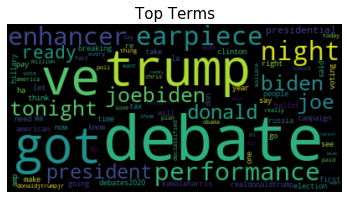

In [151]:
      
fig, ax = plt.subplots()

wordcloud = WordCloud().generate(' '.join(top_words))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title('Top Terms')
# plt.savefig('Debate_wordcloud.png');

In [166]:
for i in df.columns:
    print(i)

created_at
id
id_str
full_text
truncated
display_text_range
source
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
geo
coordinates
place
contributors
is_quote_status
quoted_status_id
quoted_status_id_str
retweet_count
favorite_count
favorited
retweeted
possibly_sensitive
lang
entities.hashtags
entities.symbols
entities.user_mentions
entities.urls
user.id
user.id_str
user.name
user.screen_name
user.location
user.description
user.url
user.entities.description.urls
user.protected
user.followers_count
user.friends_count
user.listed_count
user.created_at
user.favourites_count
user.utc_offset
user.time_zone
user.geo_enabled
user.verified
user.statuses_count
user.lang
user.contributors_enabled
user.is_translator
user.is_translation_enabled
user.profile_background_color
user.profile_background_image_url
user.profile_background_image_url_https
user.profile_background_tile
user.profile_image_url
user.profile_image_url_https
user

In [175]:
y = df['retweet_count'].values
X_train, X_test, y_train, y_test = train_test_split(x_train_vect.todense(), y, random_state = 1, test_size = 0.25)

scaler = preprocessing.StandardScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [176]:
model = RandomForestRegressor(n_jobs=-1, max_depth=3)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_jobs=-1)

In [177]:
y_pred = model.predict(X_test)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.751060158864767, 0.6500983759083337)